## Workshop with Titanic data

In [20]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading Data

In [2]:
df = pd.read_csv("./data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Exploring the Data

In [4]:
# Shape and columns
print(df.shape)
print(df.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
# Summary statistics
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
df[df['Age']<=20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S,3
12,13,0,3,"Saundercock, Mr. William Henry",0,20.0,0,0,A/5. 2151,8.0500,NaN,S,1
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14.0,0,0,350406,7.8542,NaN,S,1
22,23,1,3,"McGowan, Miss. Anna ""Annie""",1,15.0,0,0,330923,8.0292,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,870,1,3,"Johnson, Master. Harold Theodor",0,4.0,1,1,347742,11.1333,NaN,S,3
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",1,15.0,0,0,2667,7.2250,NaN,C,1
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",0,20.0,0,0,7534,9.8458,NaN,S,1
877,878,0,3,"Petroff, Mr. Nedelio",0,19.0,0,0,349212,7.8958,NaN,S,1


In [33]:
df.columns.str.upper()

Index(['PASSENGERID', 'SURVIVED', 'PCLASS', 'NAME', 'SEX', 'AGE', 'SIBSP',
       'PARCH', 'TICKET', 'FARE', 'CABIN', 'EMBARKED', 'FAMILYSIZE'],
      dtype='object')

## 3. Data Cleaning

### Handling Missing Data

In [34]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          649
Embarked         1
FamilySize       0
dtype: int64

In [25]:
df['Sex'].value_counts()

Sex
0    531
1    294
Name: count, dtype: int64

<Axes: xlabel='Sex'>

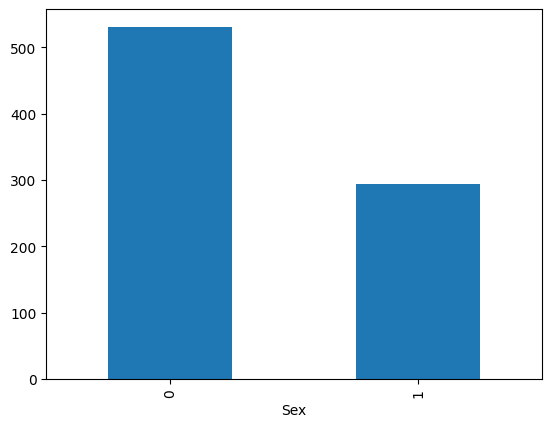

In [26]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

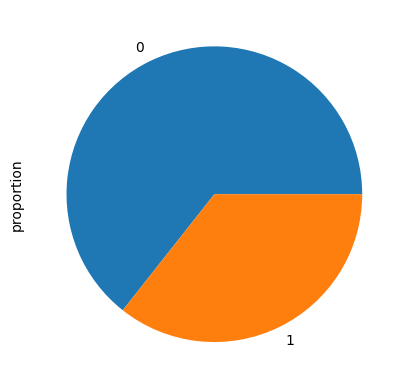

In [27]:
df['Sex'].value_counts("%.2F%%").plot(kind='pie')

In [8]:
# Fill missing age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipykernel_27104/370479023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [9]:
# Drop rows with too many missing values
df.dropna(thresh=3, inplace=True)

In [11]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Handling Duplicates

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling Outliers

In [15]:
# Remove outliers using IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          649
Embarked         1
dtype: int64

## 4. Data Transformation

In [18]:
# Encode categorical variable
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Create new feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


## 5. Exploratory Data Analysis (EDA)

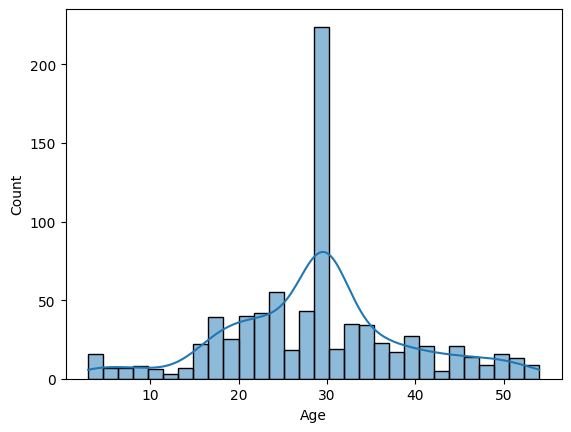

In [21]:
# Histogram
sns.histplot(df['Age'], bins=30, kde=True)
plt.show()

### Bivariate Analysis

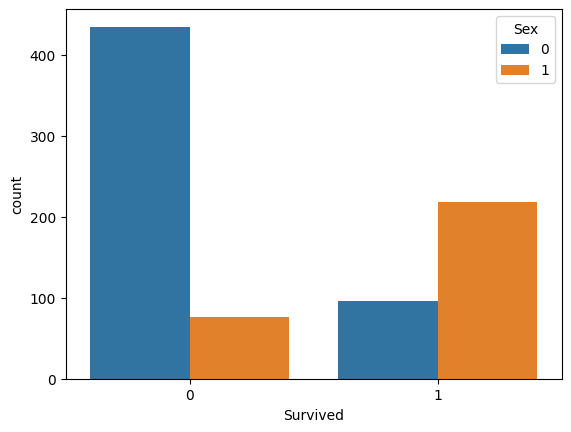

In [22]:
# Survival by sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()


<Axes: xlabel='Sex'>

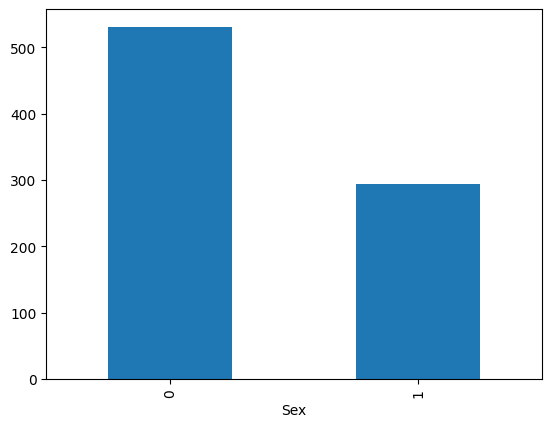

In [24]:
df['Sex'].value_counts().plot(kind='bar')